In [1]:
import pandas as pd
# import packages (some of this is from the liet library)
import sys
sys.path.append('/Users/geba9152/LIET/liet/')
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import rnap_lib_data_proc as dp
from liet_res_class import FitParse
from liet_res_class import fitparse_intersect
import numpy as np
import time
from collections import OrderedDict
import rnap_lib_data_proc as dp
from functools import reduce


Date: 5/10/2024

Objective: Looking at biological variation in the location of mT
        
 ** note tight-sT is the most optimal ref point for all ground truth genes **
 
 ### GENES TO REMOVE LIST 
```
DUSP2|NM_004418.4
HNRNPA0|NM_006805.4
ID2|NM_002166.5
LBH|NM_030915.4
NDUFS5|NM_004552.3
RHOB|NM_004040.4
RNF187|NM_001010858.3
SPCS3|NM_021928.4
TMSB10|NM_021103.4
OMA1|NM_145243.5
MIR181A1HG|NR_040073.1 ```

# Meta analysis

In [5]:
def pull_out_params_meta_samples(refpoint):
    
    # set base path
#     base_path = "/scratch/Users/geba9152/LIET-summer2024/meta-celltype-comparison"
    base_path = "/scratch/Shares/dowell/for_jacob/from_georgia/meta-results-04302024"
    
    # Initialize dictionary to store the results
    results_dict = defaultdict(pd.DataFrame)
    
    # define paths
    lietpath = f"{base_path}/results/{refpoint}/*.liet"
#     logpath = f"{base_path}/results/{refpoint}/*.liet.log"
#     configpath = f"{base_path}/config/{refpoint}/*.liet.config"

    # get list of files for each type
    lietfiles = glob.glob(lietpath)
#     logfiles = glob.glob(logpath)
#     configfiles = glob.glob(configpath)

    # process each group of files 
#     for configfile, lietfile, logfile in zip(configfiles, lietfiles, logfiles):
    for lietfile in lietfiles:
        celltype = os.path.basename(lietfile).split('.')[0]  # extract celltype from filename
       
        # call fitparse function to get model params
        fit_parser = FitParse(lietfile)
        
        data = {
            "Gene": fit_parser.genes,
            "mL": fit_parser.mL,
            "mL_std": fit_parser.mL_std,
            "sL": fit_parser.sL,
            "sL_std": fit_parser.sL_std,
            "tI": fit_parser.tI,
            "tI_std": fit_parser.tI_std,
            "mT": fit_parser.mT,
            "mT_std": fit_parser.mT_std,
            "sT": fit_parser.sT,
            "sT_std": fit_parser.sT_std,
            "w": fit_parser.w,
            "w_std": fit_parser.w_std,
            "mL_a": fit_parser.mL_a,
            "mL_a_std": fit_parser.mL_a_std,
            "sL_a": fit_parser.sL_a,
            "sL_a_std": fit_parser.sL_a_std,
            "tI_a": fit_parser.tI_a,
            "tI_a_std": fit_parser.tI_a_std,
            "w_a": fit_parser.w_a,
            "w_a_std": fit_parser.w_a_std,
        }
        
        df = pd.DataFrame(data)
        
        cellname = os.path.basename(lietfile).replace("meta_", "").replace('.liet',"")
        
        results_dict[cellname] = pd.concat([results_dict[cellname], df], ignore_index=True)
        
    # Convert list of gene sets into a list
    gene_sets = [set(df['Gene']) for df in results_dict.values()]
    # Calculate the intersection of genes across all samples
    if gene_sets:
        intersect_genes = set.intersection(*gene_sets)
    else:
        intersect_genes = set()

    # Filter each dataframe to include only the intersecting genes
    for cellname, df in results_dict.items():
        results_dict[cellname] = df[df['Gene'].isin(intersect_genes)]

    return results_dict
        
#     # Find the intersection of genes across all samples
#     intersect_genes = set.intersection(*[set(df['Gene']) for df in results_dict.values()])

#     # Filter each dataframe to include only the intersecting genes
#     for cellname, df in results_dict.items():
#         results_dict[cellname] = df[df['Gene'].isin(intersect_genes)]

#     return results_dict

                
refpoint = "lastexon-ref-tight-sT/"
meta_results_dict = pull_out_params_meta_samples(refpoint)
meta_results_dict

defaultdict(pandas.core.frame.DataFrame,
            {'HCT116':                      Gene     mL  mL_std      sL  sL_std       tI  tI_std  \
             0       RPL22|NM_000983.4  54.93    2.26   31.25    2.28  1485.19   22.81   
             1     ENO1|NM_001353346.3  27.00    2.29  203.17    2.02   350.00    4.44   
             2    UBE4B|NM_001410744.1  80.79    3.42   55.60    6.31   454.19   10.55   
             3         SRM|NM_003132.3  44.28    5.69  163.05   11.65   447.42   11.63   
             4       EFHD2|NM_024329.6  23.15    5.56  144.80   16.29   345.99   12.81   
             ..                    ...    ...     ...     ...     ...      ...     ...   
             158      NUS1|NM_138459.5  71.60    6.16  175.11   11.06   584.34   20.22   
             159     RPS12|NM_001016.4  73.56    1.06   10.24    0.21   858.62    6.45   
             160    ABRACL|NM_021243.3  11.12    8.30  219.28   10.36   444.62   16.13   
             161      HECA|NM_016217.3  74.07    

(array([20., 14.,  5.,  3.,  7., 10.,  5.,  6., 20., 73.]),
 array([-79.72 , -63.002, -46.284, -29.566, -12.848,   3.87 ,  20.588,
         37.306,  54.024,  70.742,  87.46 ]),
 <BarContainer object of 10 artists>)

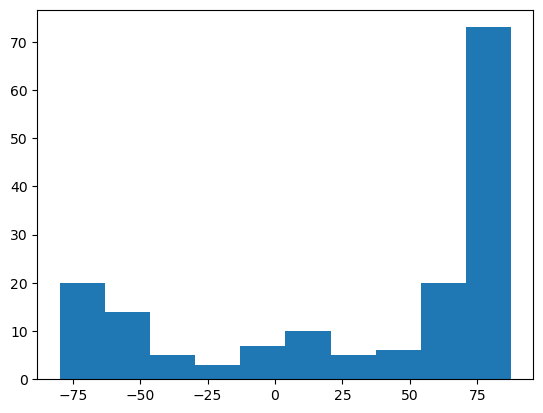

In [23]:
plt.hist(meta_results_dict['K562']['mL_a'])

In [25]:
meta_results_dict

defaultdict(pandas.core.frame.DataFrame,
            {'HCT116':                      Gene     mL  mL_std      sL  sL_std       tI  tI_std  \
             0       RPL22|NM_000983.4  54.93    2.26   31.25    2.28  1485.19   22.81   
             1     ENO1|NM_001353346.3  27.00    2.29  203.17    2.02   350.00    4.44   
             2    UBE4B|NM_001410744.1  80.79    3.42   55.60    6.31   454.19   10.55   
             3         SRM|NM_003132.3  44.28    5.69  163.05   11.65   447.42   11.63   
             4       EFHD2|NM_024329.6  23.15    5.56  144.80   16.29   345.99   12.81   
             ..                    ...    ...     ...     ...     ...      ...     ...   
             158      NUS1|NM_138459.5  71.60    6.16  175.11   11.06   584.34   20.22   
             159     RPS12|NM_001016.4  73.56    1.06   10.24    0.21   858.62    6.45   
             160    ABRACL|NM_021243.3  11.12    8.30  219.28   10.36   444.62   16.13   
             161      HECA|NM_016217.3  74.07    

In [24]:
meta_results_dict['K562']['mL_a']

0      79.45
1     -55.47
2     -13.88
3      83.42
4      77.59
       ...  
158    67.96
159    84.94
160   -31.49
161   -47.88
162    79.94
Name: mL_a, Length: 163, dtype: float64

In [33]:
163*3

489

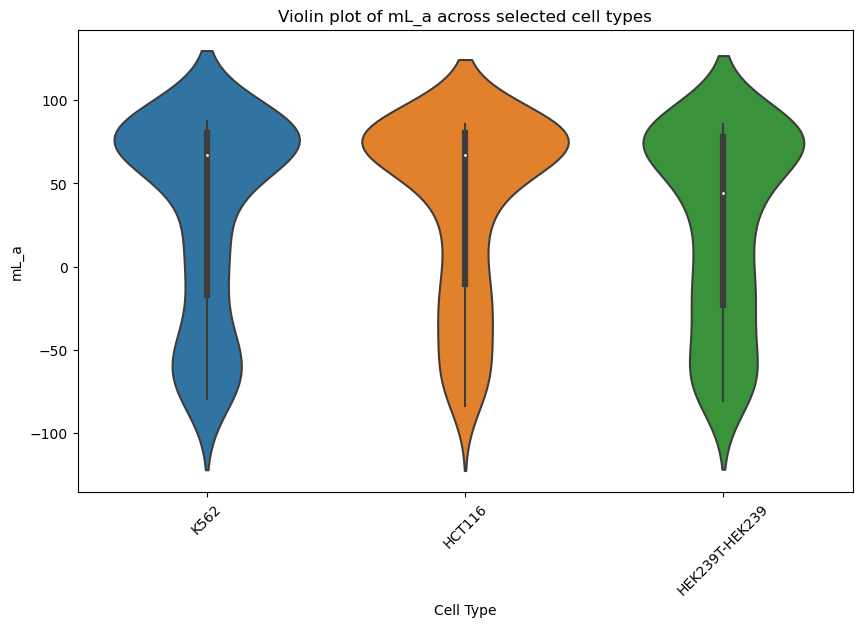

In [38]:
celltypes = ['K562','HCT116','HEK239T-HEK239']

def plot_violin_with_annotations(celltypes, meta_results_dict, column_prefix):
    
    plot_data = pd.DataFrame()
    
    for cell_type in celltypes:
        # Extract the parameter and add a cell type column
        temp_df = meta_results_dict[cell_type][['Gene', column_prefix]].copy()
        temp_df['Cell Type'] = cell_type
        plot_data = pd.concat([plot_data, temp_df], ignore_index=True)
    
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Cell Type', y=column_prefix, data=plot_data)
    plt.title(f'Violin plot of {column_prefix} across selected cell types')
    plt.ylabel(column_prefix)
    plt.xlabel('Cell Type')
    plt.xticks(rotation=45)  
    plt.show()
    

plot_violin_with_annotations(celltypes,meta_results_dict, 'mL_a')

In [8]:
def merge_dataframes(meta_results_dict):
    """
    Merge dataframes on the 'Gene' column and prefix other column names with the cell type.
    
    Parameters:
        meta_results_dict (dict): A dictionary where the key is the cell type and the value is its corresponding dataframe.
    
    Returns:
        pd.DataFrame: A merged dataframe with modified column names based on the cell type.
    """
    
    # Add prefix to columns based on the cell type
    prefixed_data = {
        key: df.rename(columns={col: f"{key}_{col}" if col != 'Gene' else col for col in df.columns})
        for key, df in meta_results_dict.items()
    }

    # Convert the dictionary of dataframes to a list
    df_list = list(prefixed_data.values())

    # Merge all dataframes on the 'Gene' column
    merged_df = reduce(lambda left, right: pd.merge(left, right, on='Gene', how='outer'), df_list)
    
    # read in liet ann to get lengths
    ann = pd.read_csv("/scratch/Users/geba9152/LIET-summer2024/meta-celltype-comparison/annotation/lietanns/chr1-6-3p-UTR.liet.ann", header = None, sep = "\t")
    ann.columns = ['chr','start','stop','Gene','length','strand']
        
    df = pd.merge(merged_df, ann[['Gene', 'length']], on='Gene')
            
    # adjust mT values by subtracting the gene length
    for col in df.columns:
        if 'mT' in col and '_mT_std' not in col:   # Check if column name contains 'mT'
                df[col] = df[col] - df['length']
            
     # List of genes to be removed
    genes_to_remove = [
        'DUSP2|NM_004418.4', 'HNRNPA0|NM_006805.4', 'ID2|NM_002166.5',
        'LBH|NM_030915.4', 'NDUFS5|NM_004552.3', 'RHOB|NM_004040.4',
        'RNF187|NM_001010858.3', 'SPCS3|NM_021928.4', 'TMSB10|NM_021103.4',
        'OMA1|NM_145243.5', 'MIR181A1HG|NR_040073.1','ZSWIM6|NM_020928.2'
    ]

    # Filter out rows where the 'Gene' column matches any gene in the list
    df = df[~df['Gene'].isin(genes_to_remove)]
    
    return df

meta_df = merge_dataframes(meta_results_dict)
meta_df

,Gene,HCT116_mL,HCT116_mL_std,HCT116_sL,HCT116_sL_std,HCT116_tI,HCT116_tI_std,HCT116_mT,HCT116_mT_std,HCT116_sT,...,HEp2_w_std,HEp2_mL_a,HEp2_mL_a_std,HEp2_sL_a,HEp2_sL_a_std,HEp2_tI_a,HEp2_tI_a_std,HEp2_w_a,HEp2_w_a_std,length
0,ABRACL|NM_021243.3,11.12,8.30,219.28,10.36,444.62,16.13,1410.22,42.48,1204.17,...,"[0.01, 0.02, 0.01, 0.02]",-20.49,31.46,522.13,35.58,49.62,33.34,"[0.35, 0.65]","[0.02, 0.02]",14558
1,ABT1|NM_013375.4,68.65,2.44,21.23,5.07,223.49,5.20,-373.80,17.13,1728.48,...,"[0.0, 0.01, 0.01, 0.01]",75.05,3.82,98.48,3.55,353.82,6.74,"[0.92, 0.08]","[0.01, 0.01]",3787
2,ACADM|NM_000016.6,59.63,3.96,182.04,3.53,138.07,5.02,2043.28,44.54,1464.38,...,"[0.0, 0.01, 0.01, 0.01]",70.06,4.44,12.79,1.98,849.08,25.98,"[0.72, 0.28]","[0.01, 0.01]",38971
3,ACBD3|NM_022735.4,79.61,1.89,19.15,1.29,143.53,3.75,3988.25,59.48,4251.01,...,"[0.0, 0.01, 0.0, 0.0]",-51.78,8.56,210.78,8.06,505.36,18.89,"[0.69, 0.31]","[0.01, 0.01]",42063
4,AGL|NM_000642.3,-23.59,1.77,120.91,1.54,11.50,1.77,2871.73,59.07,1568.23,...,"[0.01, 0.01, 0.0, 0.01]",76.15,7.09,163.20,10.47,553.95,17.52,"[0.79, 0.21]","[0.01, 0.01]",73660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,ZNF281|NM_001281294.2,44.88,5.27,33.03,4.64,3216.42,66.42,10599.09,76.00,2599.19,...,"[0.01, 0.01, 0.01, 0.01]",70.36,9.25,20.00,7.70,299.18,23.43,"[0.6, 0.4]","[0.03, 0.03]",5086
158,ZNF644|NM_016620.4,-67.38,3.22,356.05,3.77,16.45,1.01,26024.37,80.62,6578.80,...,"[0.0, 0.01, 0.0, 0.0]",42.42,13.74,255.71,21.11,880.06,33.34,"[0.63, 0.37]","[0.01, 0.01]",106180
159,ZNF684|NM_152373.4,82.97,2.53,49.77,3.57,225.93,5.49,1172.92,54.59,1478.81,...,"[0.01, 0.01, 0.0, 0.02]",-15.75,17.06,237.22,17.21,363.22,28.93,"[0.49, 0.51]","[0.02, 0.02]",16531
160,ZRANB2|NM_203350.3,80.55,1.71,50.18,2.16,164.99,3.22,9104.12,11.45,1358.48,...,"[0.0, 0.01, 0.01, 0.0]",77.00,5.92,163.45,7.46,392.78,14.25,"[0.91, 0.09]","[0.01, 0.01]",17745


In [21]:
def plot_violin_with_annotations(cell_data_df, column_prefix):
    """
    Plots violin plots with embedded data points for a specified column prefix,
    where the data is given as a DataFrame with multiple columns for different cell types.
    This function also annotates the top 5 and bottom 5 genes directly on the plot 
    for each cell type.

    Parameters:
        cell_data_df (DataFrame): DataFrame where each column represents data for a cell type.
        column_prefix (str): Prefix of the columns to plot (e.g., 'mT', 'sT').
    """
    # Filter columns related to the column_prefix
    relevant_columns = [col for col in cell_data_df.columns if column_prefix in col]

    # Melt the DataFrame to long format
    melted_data = pd.melt(cell_data_df, id_vars=['Gene'], value_vars=relevant_columns,
                          var_name='CellType', value_name=column_prefix)
    
    # Clean the 'CellType' to extract only the cell type information
    melted_data['CellType'] = melted_data['CellType'].apply(lambda x: x.split('_')[0])
    
    print(len(melted_data))

    plt.figure(figsize=(14, 8))  # Adjust size for annotations

    # Create the violin and strip plots
    ax = sns.violinplot(x='CellType', y=column_prefix, data=melted_data, scale='width', inner=None, palette="husl")
    sns.stripplot(x='CellType', y=column_prefix, data=melted_data, color='k', size=3, jitter=True, alpha=0.5)

#     plt.title(f'Violin Plot of {column_prefix} Across Cell Types')\
    plt.title(f'$\\mu_T$ (Termination Peak Position from Cleavage Site) Across Cell Types')
    plt.xlabel('Cell Type')
    plt.ylabel(f'Distance from Cleavage Site to $\\mu_T$ (bases)')
#     plt.ylabel(f'column_prefix')

    # Annotate top and bottom genes
    grouped = melted_data.groupby('CellType')
    for name, group in grouped:
        top_genes = group.nlargest(80, column_prefix)
        bottom_genes = group.nsmallest(80, column_prefix)

        # Annotate top genes
        for i, row in top_genes.iterrows():
            plt.text(x=name, y=row[column_prefix], s=row['Gene'], horizontalalignment='right', color='green', fontsize=9)

        # Annotate bottom genes
        for i, row in bottom_genes.iterrows():
            plt.text(x=name, y=row[column_prefix], s=row['Gene'], horizontalalignment='left', color='red', fontsize=9)

    plt.xticks(rotation=45)  # Rotate labels if needed
    plt.show()
    
def plot_meta_errbar(cell_data_df, mean_prefix, spread_prefix):
    """
    Plots error bars for specified mean and spread columns for each gene across cell types.

    Parameters:
        cell_data_df (DataFrame): DataFrame where each column represents data for a cell type.
        mean_prefix (str): Prefix of the columns to plot as mean values (e.g., 'mT').
        spread_prefix (str): Prefix of the columns to plot as error bars (e.g., 'mT_std').
    """
    # Define the relevant columns for mean and spread
    mean_columns = [col for col in cell_data_df.columns if mean_prefix in col and not col.endswith('_std')]
    spread_columns = [col for col in cell_data_df.columns if spread_prefix in col and col.endswith('_std')]

    # Get a list of all genes
    genes = cell_data_df['Gene'].unique()

    # Iterate over each gene to plot
    for gene in genes:
        plt.figure(figsize=(14, 8))
        
        # Extract data for this specific gene
        gene_data = cell_data_df[cell_data_df['Gene'] == gene]

        # Extract and plot data for each cell type
        for mean_col, spread_col in zip(mean_columns, spread_columns):
            cell_type = mean_col.split('_')[0]  # Assuming cell type is the prefix before '_'
            mean_values = gene_data[mean_col]
            spread_values = gene_data[spread_col]
            
            plt.errorbar(x=cell_type, y=mean_values, yerr=spread_values, fmt='o', 
                         ecolor='gray', capsize=5, linestyle='None', markersize=7, label=cell_type)
        
        plt.title(f'{mean_prefix} with {spread_prefix} bars for {gene}')
        plt.xlabel('Cell Type')
        plt.ylabel(f'{mean_prefix} Values')
        plt.ylim(-4000,10000)
        plt.xticks(rotation=45) 
        plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
        plt.show()
        plt.close()
        

# plot_meta_errbar(meta_df_subset, 'mT', 'sT')

1510


/Users/geba9152/miniconda3/envs/pymc_jupnbk/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/geba9152/miniconda3/envs/pymc_jupnbk/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/geba9152/miniconda3/envs/pymc_jupnbk/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


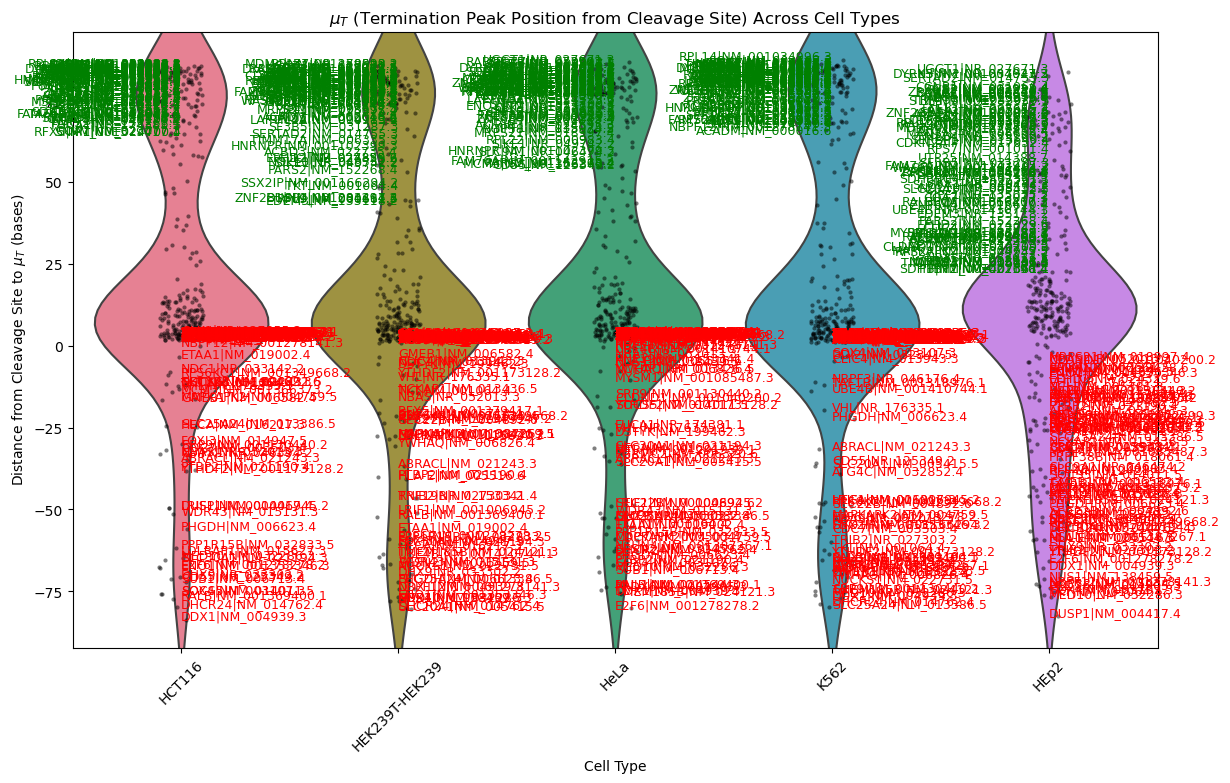

In [22]:
plot_violin_with_annotations(meta_df, 'mL_a')
